# CifEnsemble

For high-throuhgput analysis, you can initialize multiple `.cif` files using `CifEnsemble`.

## Initialize with folder path and preprocess automatically

- `CifEnsemble` standardizes the site labels in `atom_site_label`. Some site labels may contain a comma or a symbol such as M due to atomic mixing. CBA reformats each `atom_site_label` so it can be parsed into an element type that matches atom_site_type_symbol.

- `CifEnsemble` removes the content of `publ_author_address`. This section often has an incorrect format that otherwise requires manual modifications.

- `CifEnsemble` relocates any ill-formatted files, such as those with duplicate labels in `atom_site_label`, missing fractional coordinates, or files that require supercell generation.

In [1]:
from cifkit import CifEnsemble, Example

# Initialize
ensemble = CifEnsemble(Example.ErCoIn_folder_path)


CIF Preprocessing in Example.ErCoIn_folder_path begun...

Preprocessing /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er10Co9In20.cif (1/3)
Preprocessing /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er5In3.cif (2/3)
Preprocessing /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/ErCoIn5.cif (3/3)

SUMMARY
# of files moved to 'error_operations' folder: 0
# of files moved to 'error_duplicate_labels' folder: 0
# of files moved to 'error_wrong_loop_value' folder: 0
# of files moved to 'error_coords' folder: 0
# of files moved to 'error_invalid_label' folder: 0
# of files moved to 'error_others' folder: 0

Initializing 3 Cif objects...
Finished initialization!


## Initialize with nested files

You can also use the `add_nested_files` flag to include `.cif` files that are located in folders within the folder path provided.

In [2]:

# Initialize with nested .cif files in the folder
ensemble_nested = CifEnsemble(Example.ErCoIn_folder_path, add_nested_files=True)


CIF Preprocessing in Example.ErCoIn_folder_path begun...

Preprocessing /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er10Co9In20.cif (1/3)
Preprocessing /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er5In3.cif (2/3)
Preprocessing /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/ErCoIn5.cif (3/3)

SUMMARY
# of files moved to 'error_operations' folder: 0
# of files moved to 'error_duplicate_labels' folder: 0
# of files moved to 'error_wrong_loop_value' folder: 0
# of files moved to 'error_coords' folder: 0
# of files moved to 'error_invalid_label' folder: 0
# of files moved to 'error_others' folder: 0

Initializing 3 Cif objects...
Finished initialization!


## Get instant properties

Once the object is created, you can get instant properties suhc as file count, folder path, etc.

In [3]:
# Get .cif file count in the folder
print("File count:", ensemble.file_count) # 6

# Get the directory path
print("Directory path:", ensemble.dir_path)

# Get all file paths in the folder
print("File paths:", ensemble.file_paths)

# Get all Cif objects initialized
print("Cif objects:", ensemble.cifs)

File count: 3
Directory path: Example.ErCoIn_folder_path
File paths: ['/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er10Co9In20.cif', '/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er5In3.cif', '/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/ErCoIn5.cif']
Cif objects: [<cifkit.models.cif.Cif object at 0x15c7d0650>, <cifkit.models.cif.Cif object at 0x15c4a0470>, <cifkit.models.cif.Cif object at 0x15c977ce0>]


## Get individual .cif properties

The `CifEnsemble` object contains a property called `cifs` which contains a list of `Cif` objects. You may loop through each to access both instant and computed properties described in the previous `CIF` section.

In [4]:
# Print each property for each .cif file
for cif in ensemble.cifs:
  print(f"\n{cif.file_name}")
  print("Formula:", cif.formula)
  print("Tag:", cif.tag)
  print("Mixing type:", cif.site_mixing_type)
  print("Unique bond pairs:", cif.bond_pairs)


Er10Co9In20.cif
Formula: Er10Co9In20
Tag: 
Mixing type: full_occupancy
Unique bond pairs: {('Co', 'In'), ('Er', 'Er'), ('In', 'In'), ('Co', 'Co'), ('Co', 'Er'), ('Er', 'In')}

Er5In3.cif
Formula: Er5In3
Tag: 
Mixing type: full_occupancy
Unique bond pairs: {('In', 'In'), ('Er', 'In'), ('Er', 'Er')}

ErCoIn5.cif
Formula: ErCoIn5
Tag: rt
Mixing type: full_occupancy
Unique bond pairs: {('Co', 'In'), ('Er', 'Er'), ('In', 'In'), ('Co', 'Co'), ('Co', 'Er'), ('Er', 'In')}


## Get unique properties

You can get all unique attributres such as formulas, elements, etc in the folder.

In [5]:
# Get unique formulas
print("Unique formulas:", ensemble.unique_formulas)

# Get unique elements
print("Unique elements:", ensemble.unique_elements)

# Get unique structures
print("Unique structures:", ensemble.unique_structures)

# Get unique atomix mixing types
print("Unique atomic mixing types:", ensemble.unique_site_mixing_types)

# Get unique elements
print("Unique elements including nested:", ensemble_nested.unique_elements)

# Get unique space group names
print("Unique space group names:", ensemble.unique_space_group_names)

# Get unique space group numbers
print("Unique space group numbers:",ensemble.unique_space_group_numbers)

# Get unique tags
print("Unique tags:", ensemble.unique_tags)

# Get unique composition types
print("Unique composition types:", ensemble.unique_composition_types)

Unique formulas: {'Er5In3', 'Er10Co9In20', 'ErCoIn5'}
Unique elements: {'Er', 'Co', 'In'}
Unique structures: {'Ho10Ni9In20', 'Mn5Si3', 'HoCoGa5'}
Unique atomic mixing types: {'full_occupancy'}
Unique elements including nested: {'Er', 'Co', 'In'}
Unique space group names: {'P63/mcm', 'P4/nmm(originchoice2)', 'P4/mmm'}
Unique space group numbers: {129, 123, 193}
Unique tags: {'', 'rt'}
Unique composition types: {2, 3}


## Get overall stats by attribute

Get the number of files for each unique properties.

In [6]:
# Get file count per structure
print("Structure stats:", ensemble.structure_stats)

# Get file count per formula
print("Formula stats:", ensemble.formula_stats)

# Get file count per tag
print("Tag stats:", ensemble.tag_stats)

# Get file count per space group number
print("Space group number stats:", ensemble.space_group_number_stats)

# Get file count per space group name
print("Space group name stats:", ensemble.space_group_name_stats)

# Get file count per composition type
print("Composition type stats:", ensemble.composition_type_stats)

# Get file count per Element
print("Unique elements stats:", ensemble.unique_elements_stats)

# Get file count per site mixing type
print("Site mixing type stats:", ensemble.site_mixing_type_stats)

# Get file count per supercell atom count
print("Supercell size stats:", ensemble.supercell_size_stats)

# Get file count per CN value by min dist method
print("CN value using min dist method stats:", ensemble.unique_CN_values_by_min_dist_method_stat)

# Get file count per CN value by best methods
print("CN value using best methods stats:", ensemble.unique_CN_values_by_method_methods_stat)

Structure stats: {'Ho10Ni9In20': 1, 'Mn5Si3': 1, 'HoCoGa5': 1}
Formula stats: {'Er10Co9In20': 1, 'Er5In3': 1, 'ErCoIn5': 1}
Tag stats: {'': 2, 'rt': 1}
Space group number stats: {129: 1, 193: 1, 123: 1}
Space group name stats: {'P4/nmm(originchoice2)': 1, 'P63/mcm': 1, 'P4/mmm': 1}
Composition type stats: {3: 2, 2: 1}
Unique elements stats: {'Er': 3, 'In': 3, 'Co': 2}
Site mixing type stats: {'full_occupancy': 3}
Supercell size stats: {2654: 1, 558: 1, 255: 1}
CN value using min dist method stats: {10: 1, 12: 2, 13: 1, 14: 2, 16: 1, 17: 1, 11: 2, 15: 1, 8: 1, 18: 1}
CN value using best methods stats: {10: 1, 12: 2, 13: 1, 14: 3, 16: 1, 17: 1, 11: 2, 15: 1, 18: 1}


## Filter .cif containing specific attributes


In [7]:
# Return file paths by formulas
ensemble.filter_by_formulas(["ErCoIn", "Er10Co9In20"]) 

# Return file paths by structures
ensemble.filter_by_structures(["Mn5Si3"])

# Return file paths by space group names
ensemble.filter_by_space_group_names(["P4/mmm"])

# Return file paths by space group numbers
ensemble.filter_by_space_group_numbers([123])

# Return file paths by site mixing types
ensemble.filter_by_site_mixing_types(["full_occupancy"])
ensemble.filter_by_site_mixing_types(["full_occupancy", "deficiency_without_atomic_mixing"])

# Return file paths by composition types (1-> unary, 2-> binary)
ensemble.filter_by_composition_types([3])



{'/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er10Co9In20.cif',
 '/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/ErCoIn5.cif'}

## Filter .cif by specific attributes

Filter .cif files either containing a set of items or files that exactly contain the values passed. `cifkit` supports elements and coordination numbers.


In [8]:

print("\nFile paths containing Er or Co or In:")
print(ensemble.filter_by_elements_containing(["Er", "Co", "In"])) # 

print("\nFile paths containing Er and In:")
print(ensemble.filter_by_elements_exact_matching(["Er", "In"]))

print("\nFile paths containing CN value of 15:")
print(ensemble.filter_by_CN_min_dist_method_containing([15]))
print(ensemble.filter_by_CN_best_methods_containing([15]))

print("\nFile paths containing CN value of 11, 14, and 15:")
print(ensemble.filter_by_CN_min_dist_method_exact_matching([11, 14, 15]))
print(ensemble.filter_by_CN_best_methods_exact_matching([11, 14, 15]))


File paths containing Er or Co or In:
{'/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/ErCoIn5.cif', '/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er10Co9In20.cif', '/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er5In3.cif'}

File paths containing Er and In:
{'/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er5In3.cif'}

File paths containing CN value of 15:
{'/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er5In3.cif'}
{'/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er5In3.cif'}

File paths containing CN value of 11, 14, and 15:
{'/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er5In3.cif'}
{'/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er5In3.cif'}


## Filter by range

In [9]:
# Return a set of .cif file paths with min distance between 1.0 Å and 3.0 Å
print("File paths with min distance between 1.0 Å and 3.0 Å:\n", ensemble.filter_by_min_distance(1.0, 3.0))

# Return a set of .cif file paths with supercell atom count above 500 and below 3000.
print("File paths with supercell atom count above 500 and below 3000:\n",ensemble.filter_by_supercell_count(300, 3000))

File paths with min distance between 1.0 Å and 3.0 Å:
 {'/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/ErCoIn5.cif', '/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er10Co9In20.cif'}
File paths with supercell atom count above 500 and below 3000:
 {'/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er10Co9In20.cif', '/Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/Er5In3.cif'}


## Move and copy files

Assume you have a set of file paths filered using the functions described in the previous section. Since we are using Jupyter and with predefined examples, you need to provide `file_paths` and `dest_dir_path` for your system.

```python
file_paths = {
    "tests/data/cif/ensemble_test/300169.cif",
    "tests/data/cif/ensemble_test/300171.cif",
    "tests/data/cif/ensemble_test/300170.cif",
}

# To move files
ensemble.move_cif_files(file_paths, dest_dir_path)

# To copy files
ensemble.copy_cif_files(file_paths, dest_dir_path)
```

## Generate histograms

Folder 'histograms' created at 'Example.ErCoIn_folder_path'.


2024-07-09 22:09:41,399 - INFO - Histograms has been saved in /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/histograms/structures.png.


Folder 'histograms' already exists at 'Example.ErCoIn_folder_path'.


2024-07-09 22:09:41,776 - INFO - Histograms has been saved in /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/histograms/formula.png.


Folder 'histograms' already exists at 'Example.ErCoIn_folder_path'.


2024-07-09 22:09:42,131 - INFO - Histograms has been saved in /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/histograms/tag.png.


Folder 'histograms' already exists at 'Example.ErCoIn_folder_path'.


2024-07-09 22:09:42,489 - INFO - Histograms has been saved in /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/histograms/space_group_number.png.


Folder 'histograms' already exists at 'Example.ErCoIn_folder_path'.


2024-07-09 22:09:42,848 - INFO - Histograms has been saved in /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/histograms/space_group_name.png.


Folder 'histograms' already exists at 'Example.ErCoIn_folder_path'.


2024-07-09 22:09:43,252 - INFO - Histograms has been saved in /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/histograms/supercell_size.png.


Folder 'histograms' already exists at 'Example.ErCoIn_folder_path'.


2024-07-09 22:09:43,688 - INFO - Histograms has been saved in /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/histograms/elements.png.


Folder 'histograms' already exists at 'Example.ErCoIn_folder_path'.


2024-07-09 22:09:44,061 - INFO - Histograms has been saved in /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/histograms/CN_by_min_dist_method.png.


Folder 'histograms' already exists at 'Example.ErCoIn_folder_path'.


2024-07-09 22:09:44,960 - INFO - Histograms has been saved in /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/histograms/CN_by_best_methods.png.


Folder 'histograms' already exists at 'Example.ErCoIn_folder_path'.


2024-07-09 22:09:45,422 - INFO - Histograms has been saved in /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/histograms/composition_type.png.


Folder 'histograms' already exists at 'Example.ErCoIn_folder_path'.


2024-07-09 22:09:45,850 - INFO - Histograms has been saved in /Users/imac/Downloads/cifkit/src/cifkit/data/ErCoIn/histograms/site_mixing_type.png.


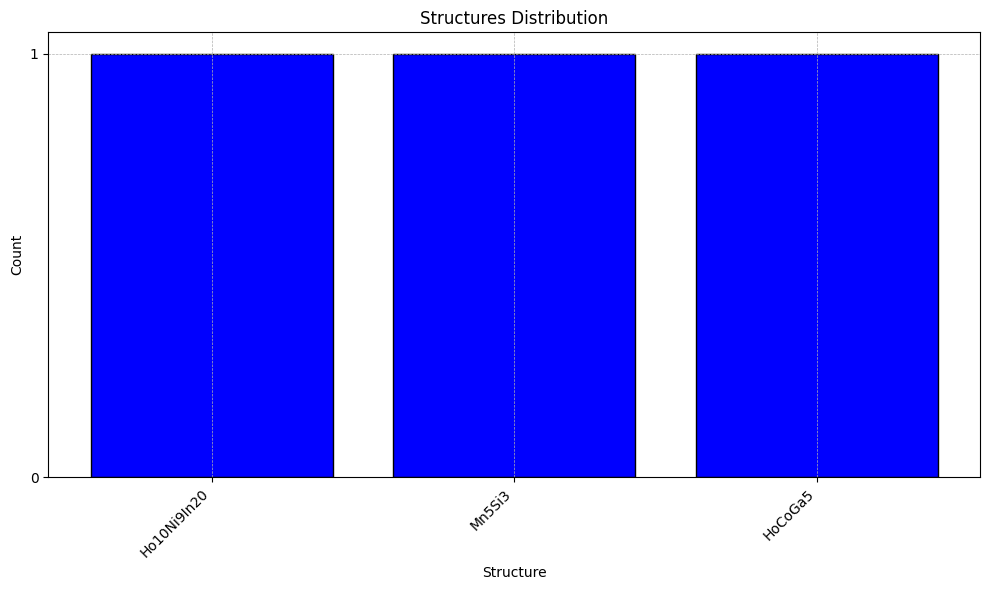

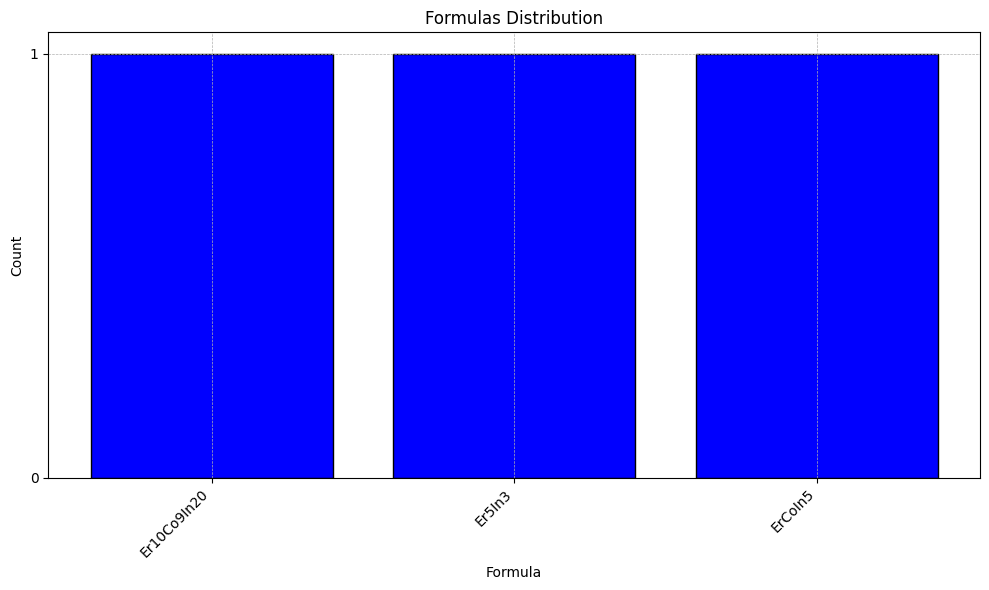

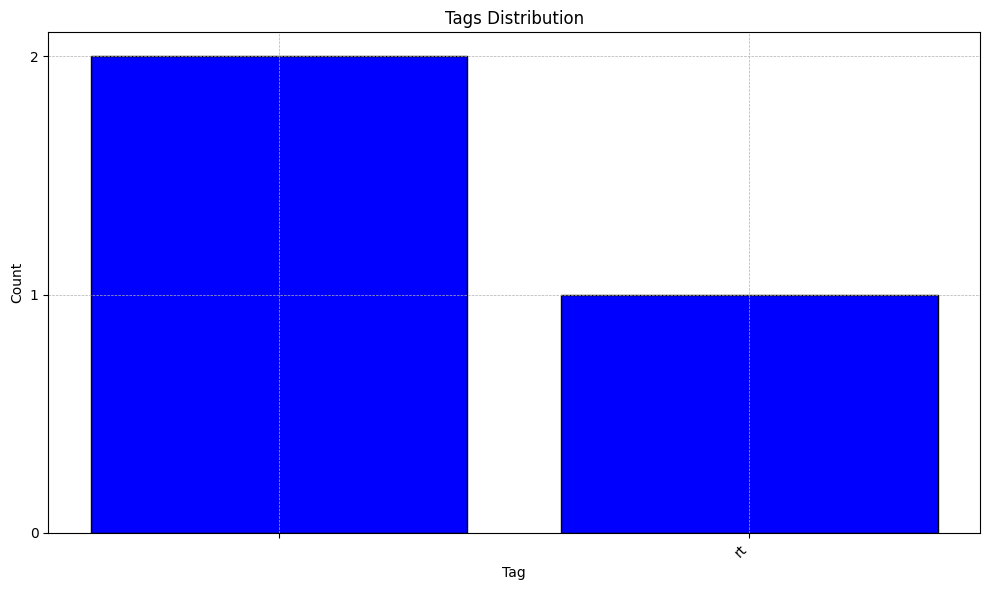

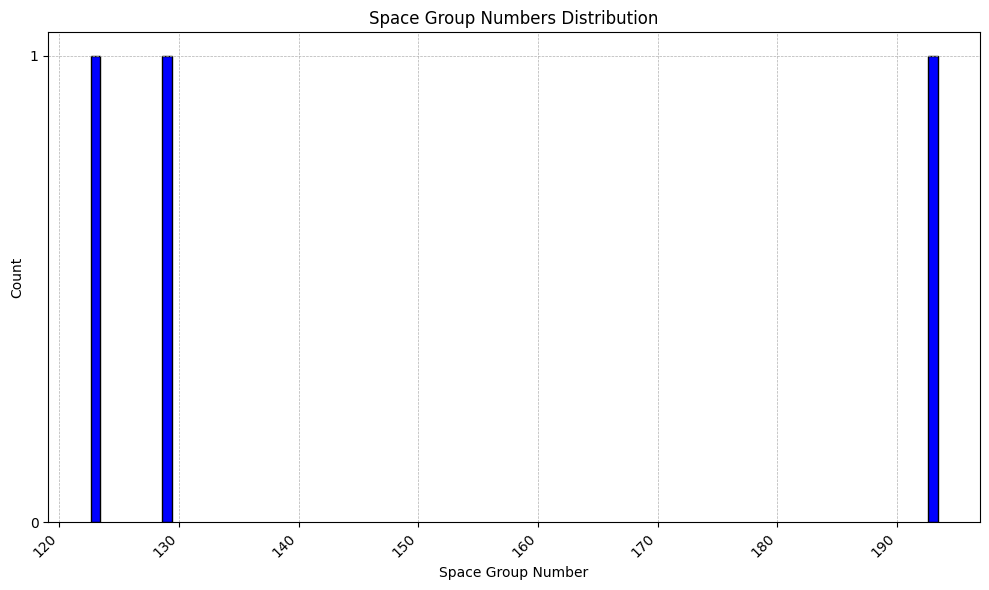

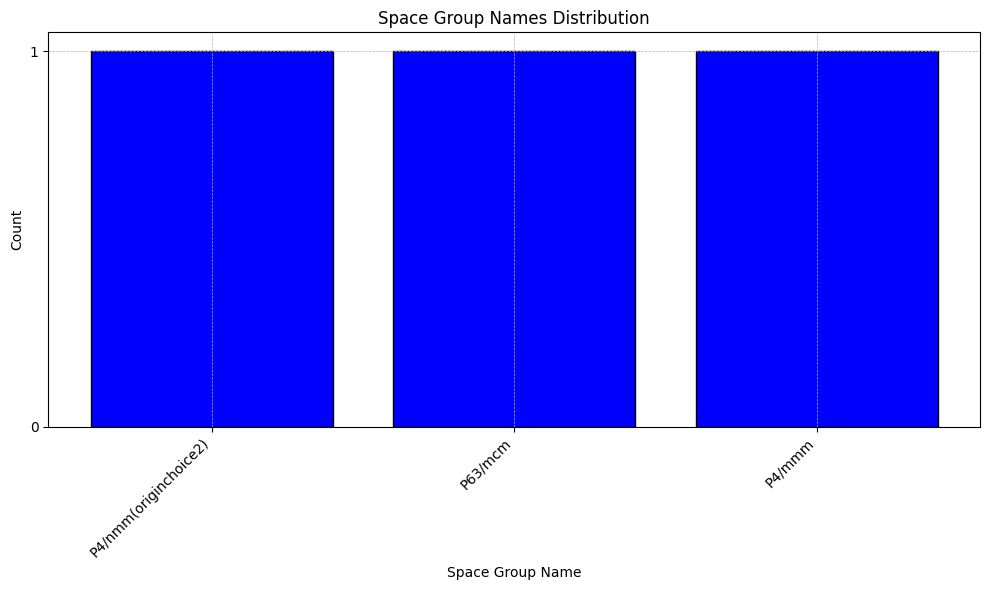

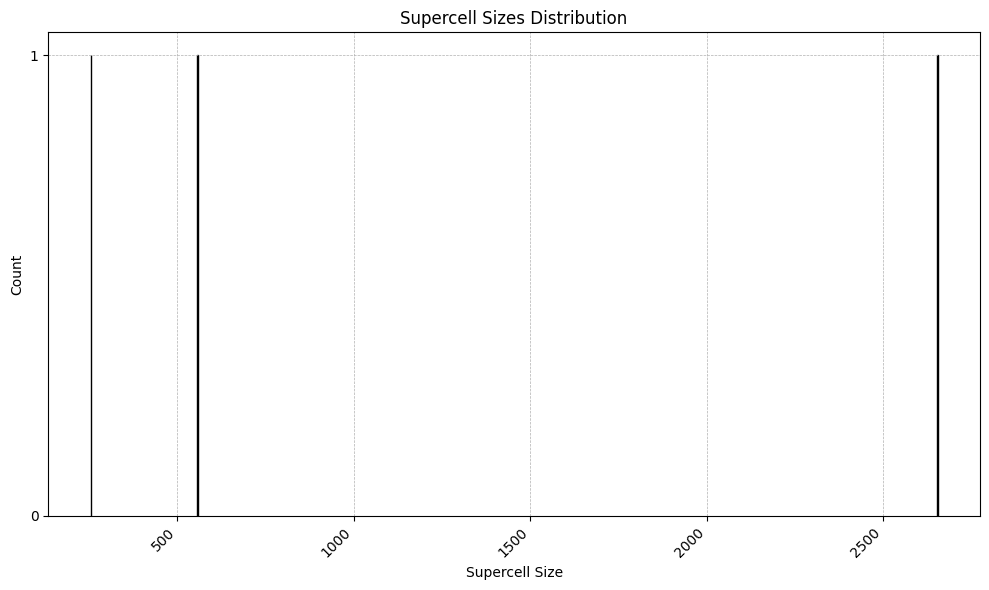

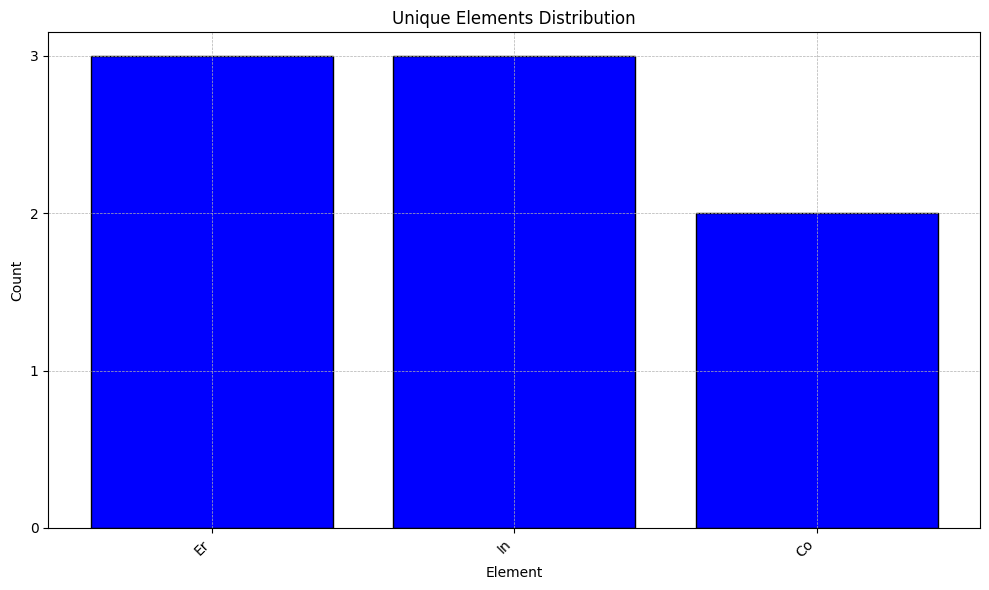

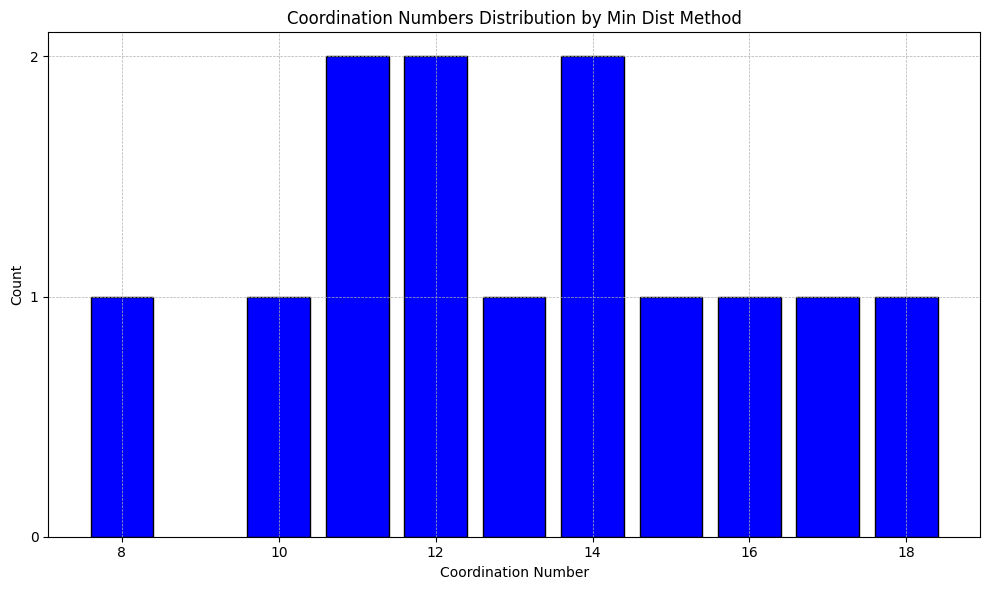

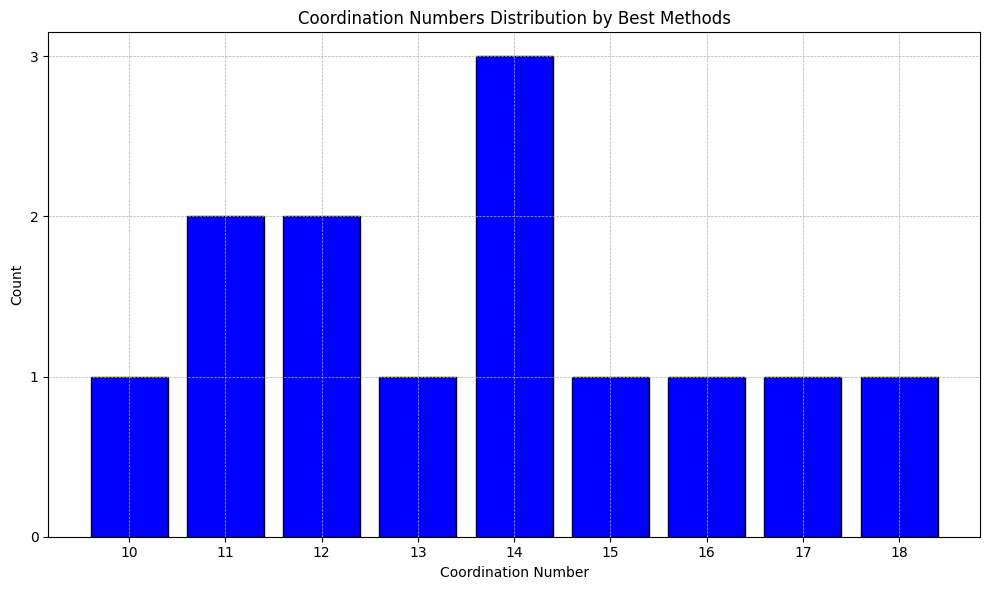

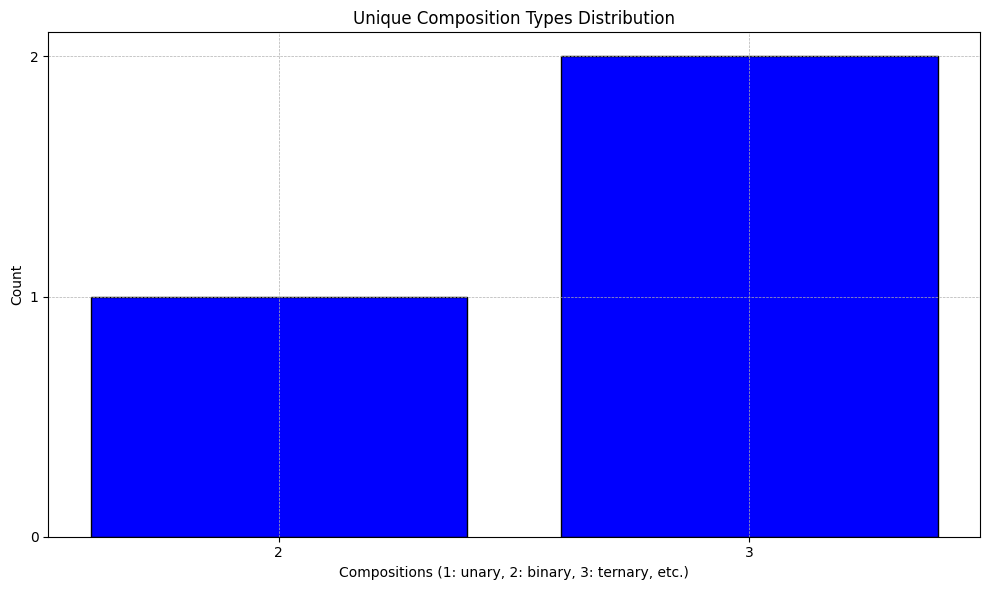

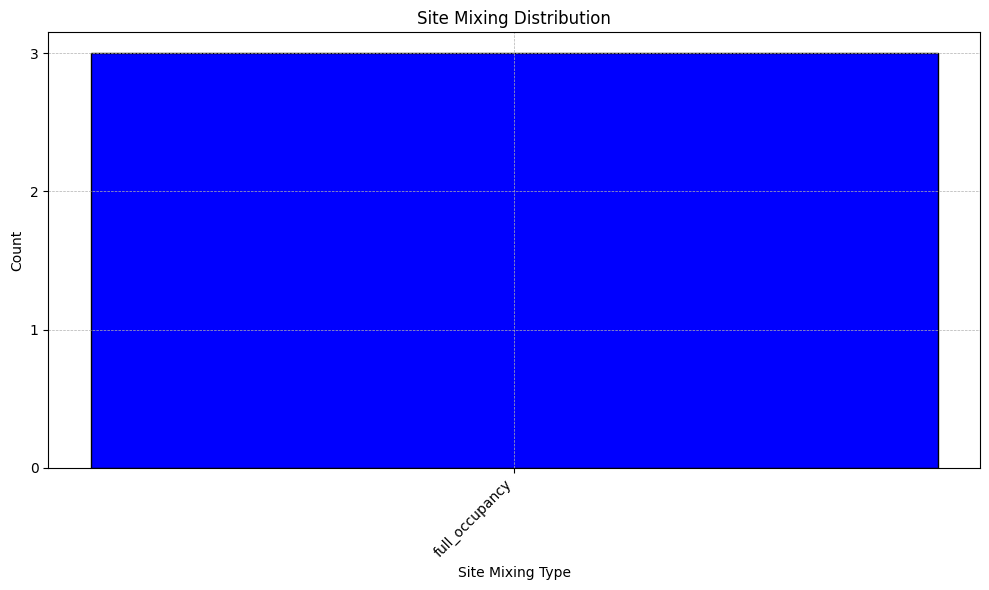

In [10]:
ensemble.generate_structure_histogram()
ensemble.generate_formula_histogram()
ensemble.generate_tag_histogram()
ensemble.generate_space_group_number_histogram()
ensemble.generate_space_group_name_histogram()
ensemble.generate_supercell_size_histogram()
ensemble.generate_elements_histogram()
ensemble.generate_CN_by_min_dist_method_histogram()
ensemble.generate_CN_by_best_methods_histogram()
ensemble.generate_composition_type_histogram()
ensemble.generate_site_mixing_type_histogram()